# Feasibility

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score


# data generators 
train_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/train'
validation_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, # Augmentations 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False) # THIS LINE IMPORTANT


Found 464 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


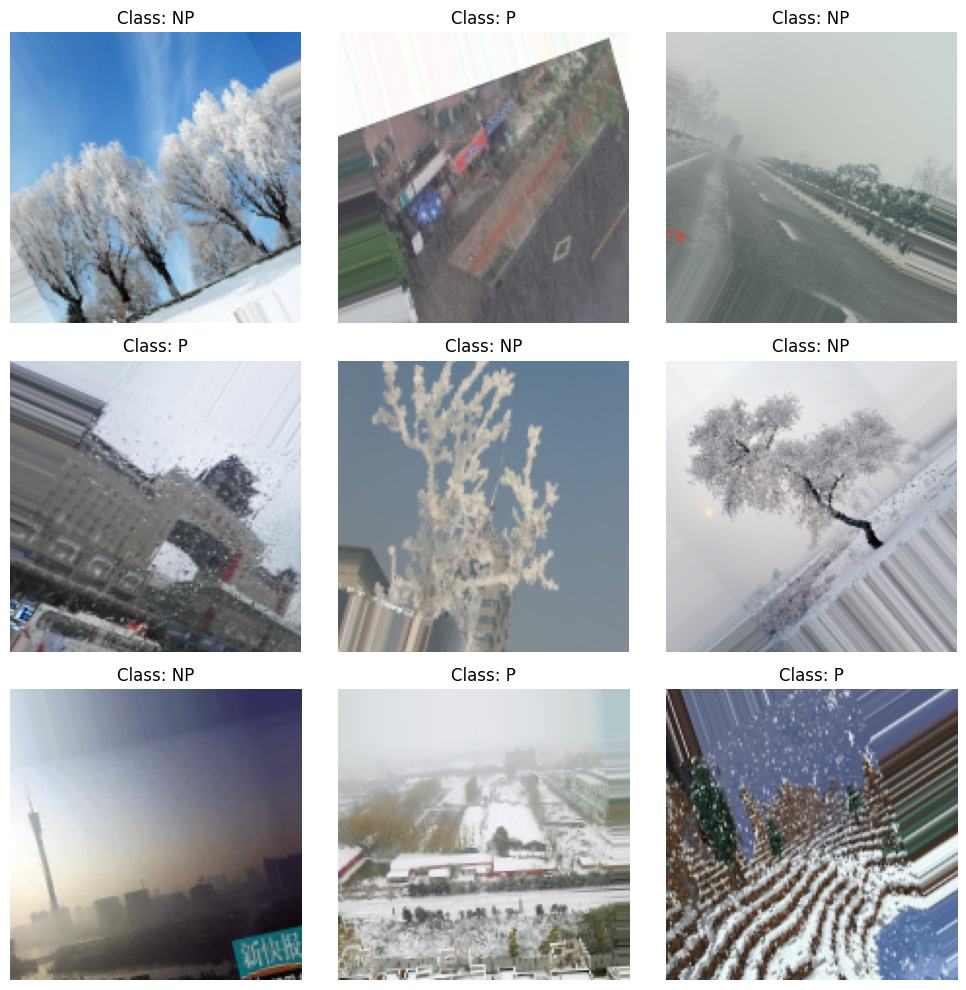

In [3]:

# get augmented images , get mapping from class index to class name, and plotting the first 9
augmented_images, augmented_labels = next(train_generator)

class_names = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    class_name = class_names[int(augmented_labels[i])]
    plt.title(f"Class: {class_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
# defining and compiling FEASIBILITY
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False  # Keep the base frozen

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

# only training for a few
print(" Starting Feasibility Training ")
history = model.fit(
      train_generator,
      steps_per_epoch=29,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=6)



2025-07-28 13:05:04.814233: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-07-28 13:05:04.814269: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-28 13:05:04.814295: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1753725904.814350 24237148 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1753725904.814411 24237148 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 Starting Feasibility Training 
Epoch 1/10


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-07-28 13:05:05.743492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5877 - loss: 0.7160

/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.6004 - loss: 0.7042 - val_accuracy: 0.7069 - val_loss: 0.5856
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7645 - loss: 0.5149 - val_accuracy: 0.8276 - val_loss: 0.4817
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.8395 - loss: 0.4150 - val_accuracy: 0.7931 - val_loss: 0.4370
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8015 - loss: 0.4239 - val_accuracy: 0.8362 - val_loss: 0.3945
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8234 - loss: 0.3924 - val_accuracy: 0.8621 - val_loss: 0.3687
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.8792 - loss: 0.3469 - val_accuracy: 0.8879 - val_loss: 0.3252
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8754 - loss: 0.3103 - val_accuracy: 0.8793 - val_loss: 0.3125
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.8735 - loss: 0.3209 - val_accuracy: 0.8793 - val_


Plotting Feasibility Results 


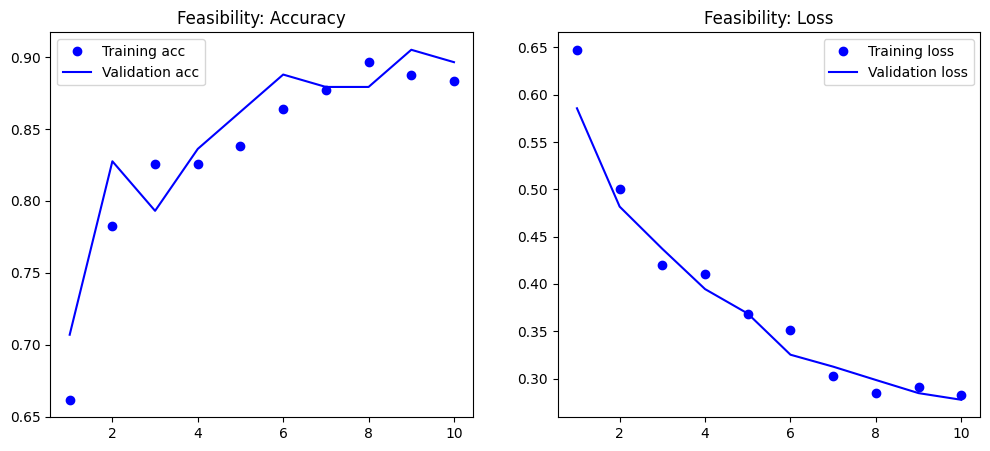

In [5]:
print("\nPlotting Feasibility Results ")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Feasibility: Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Feasibility: Loss')
plt.legend()

plt.show()

Frozen base and simple trainable head PROMISING RESULTS, no overfitting and good scores


In [ ]:

print(" Evaluating Feasibility Model")

# just to be safe
validation_generator.reset()

#  predictions
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes

# metrics
print(f"Feasibility Model F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFeasibility Model Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

 Evaluating Feasibility Model
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Feasibility Model F1 Score: 0.8966

Feasibility Model Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.90      0.90      0.90        58
   Precipitation       0.90      0.90      0.90        58

        accuracy                           0.90       116
       macro avg       0.90      0.90      0.90       116
    weighted avg       0.90      0.90      0.90       116



setting shuffle to false yielding very reasonable results for short test

# Prototype

In [ ]:


#defining model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# classifier head 
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

print("--- Starting Prototype Initial Training ---")
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=0)




# fine tuning 
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

print("\n Starting Prototype Fine Tuning  ")
history_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=2)







--- Starting Prototype Initial Training ---


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



 Starting Prototype Fine Tuning  
Epoch 1/20
23/23 - 8s - 346ms/step - accuracy: 0.8478 - loss: 0.3489 - val_accuracy: 0.9000 - val_loss: 0.2631
Epoch 2/20
23/23 - 2s - 68ms/step - accuracy: 1.0000 - loss: 0.1012 - val_accuracy: 0.9100 - val_loss: 0.2535
Epoch 3/20
23/23 - 7s - 294ms/step - accuracy: 0.8716 - loss: 0.2847 - val_accuracy: 0.9200 - val_loss: 0.2333
Epoch 4/20
23/23 - 1s - 54ms/step - accuracy: 0.9000 - loss: 0.2361 - val_accuracy: 0.9200 - val_loss: 0.2354
Epoch 5/20
23/23 - 7s - 295ms/step - accuracy: 0.8986 - loss: 0.2497 - val_accuracy: 0.9200 - val_loss: 0.2284
Epoch 6/20
23/23 - 1s - 56ms/step - accuracy: 0.9500 - loss: 0.1488 - val_accuracy: 0.9100 - val_loss: 0.2374
Epoch 7/20
23/23 - 7s - 285ms/step - accuracy: 0.9099 - loss: 0.2592 - val_accuracy: 0.9100 - val_loss: 0.2203
Epoch 8/20
23/23 - 1s - 57ms/step - accuracy: 0.9500 - loss: 0.1391 - val_accuracy: 0.9000 - val_loss: 0.2442
Epoch 9/20
23/23 - 7s - 283ms/step - accuracy: 0.9009 - loss: 0.2492 - val_accura

Building on the feasibility model by fine tuning the top layers of VGG16, adding dropout for regularization, and increasing epochs.

improving generalization without overcomplicating the model.

In [8]:
print("\n Evaluating Final Prototype ")
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes




predicted_classes = predicted_classes[:len(true_classes)]

print(f"Final F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFinal Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

print(f"True classes shape: {true_classes.shape}")
print(f"Predicted classes shape: {predicted_classes.shape}")


 Evaluating Final Prototype 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
Final F1 Score: 0.9402

Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.95      0.93      0.94        58
   Precipitation       0.93      0.95      0.94        58

        accuracy                           0.94       116
       macro avg       0.94      0.94      0.94       116
    weighted avg       0.94      0.94      0.94       116

True classes shape: (116,)
Predicted classes shape: (116,)


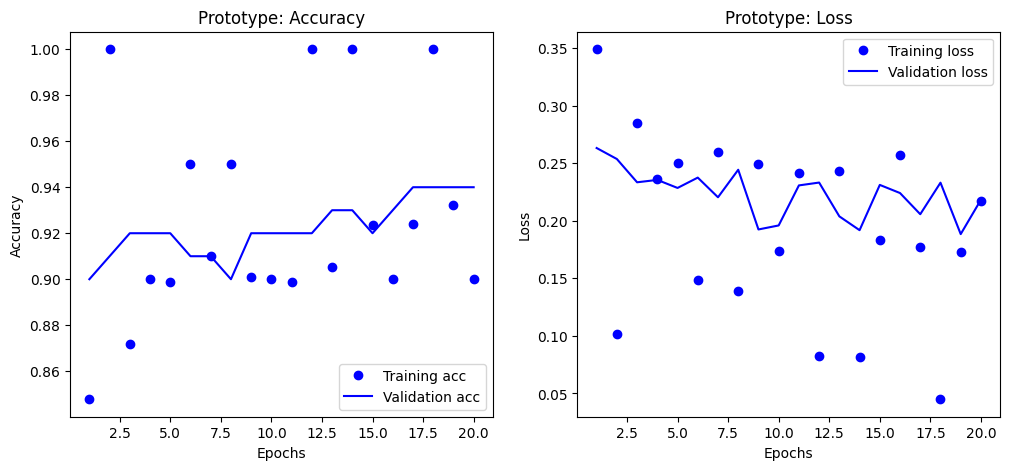

In [ ]:

acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# acc
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Prototype: Accuracy')
plt.xlabel('Epochs') # Kept these labels as they are good practice
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Prototype: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


ERRATIC DOTS AND INSTABILITY SAY LEARNING RATE IS SLIGHTLY TOO HIGH, SEEMS TO LEARN WELL AS PER THE VALIDATION STABILITY AND SCORES

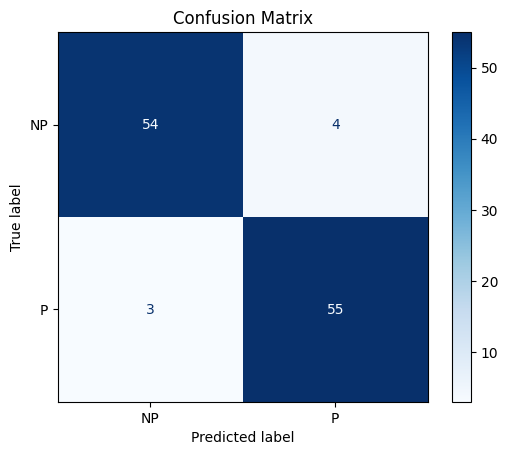

In [10]:

cm = confusion_matrix(true_classes, predicted_classes)
labels = ['NP', 'P']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


## Early Stopping Model

implementing early stopping as validation loss seems to reach a low point yet continues on, we want to save model at its peak performance 

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping #  EarlyStopping callback


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])



# fine tuning starting

# Using the callback, this will monitor the validation loss and stop training if it doesn't improve for 5 epochs.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Add the callback to the model.fit() call
history_final = model.fit(
      train_generator,
      steps_per_epoch=23,
      epochs=20, 
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[early_stopping] 
)


--- Starting Prototype Fine Tuning ---
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.6880 - loss: 0.6102 - val_accuracy: 0.8800 - val_loss: 0.3959
Epoch 2/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.8000 - loss: 0.3774

/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8000 - loss: 0.3774 - val_accuracy: 0.8600 - val_loss: 0.3955
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.8737 - loss: 0.3634 - val_accuracy: 0.8900 - val_loss: 0.3128
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9000 - loss: 0.3803 - val_accuracy: 0.8900 - val_loss: 0.3008
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.8784 - loss: 0.2843 - val_accuracy: 0.9000 - val_loss: 0.2818
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9500 - loss: 0.1472 - val_accuracy: 0.9000 - val_loss: 0.2797
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.8890 - loss: 0.2832 - val_accuracy: 0.8900 - val_loss: 0.2746
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7500 - loss: 0.5472 - val_accuracy: 0.8700 - val_loss: 0.3407
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.9221 - loss: 0.2531 - val_accuracy: 0.9100 - val_loss

In [15]:
print("\n Evaluating Final Prototype ")
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes




predicted_classes = predicted_classes[:len(true_classes)]

print(f"Final F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFinal Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

print(f"True classes shape: {true_classes.shape}")
print(f"Predicted classes shape: {predicted_classes.shape}")


 Evaluating Final Prototype 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Final F1 Score: 0.9189

Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.89      0.97      0.93        58
   Precipitation       0.96      0.88      0.92        58

        accuracy                           0.92       116
       macro avg       0.93      0.92      0.92       116
    weighted avg       0.93      0.92      0.92       116

True classes shape: (116,)
Predicted classes shape: (116,)


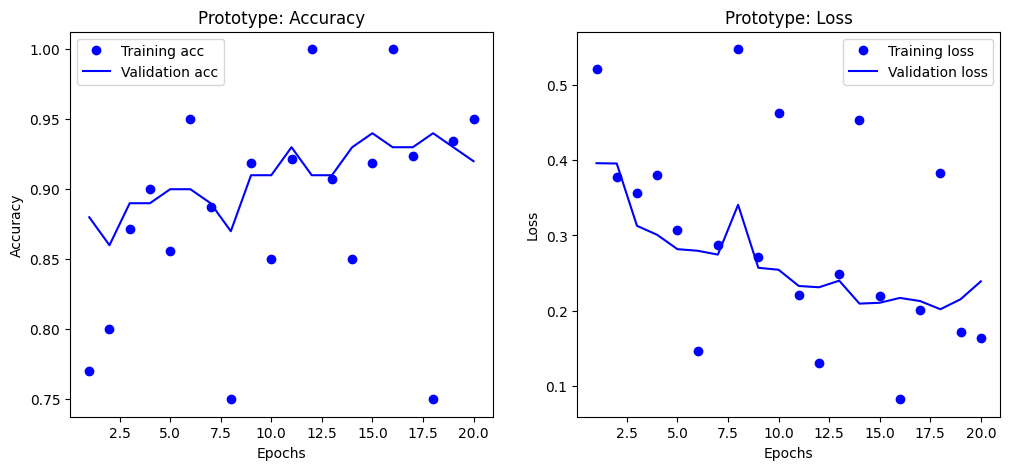

In [ ]:

acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Prototype: Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Prototype: Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.show()


ERRATIC training but generalizes well, 

reasons for unstable training - 
- learning rate?
- VGG16 base frozen in feasibility and unfrozen in prototypes?
- small data set? 

## LOWER LEARNING RATE MODEL

In [ ]:


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Freeze the base and train the new classifier head
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])


model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=0) # keep the log clean for this part


# FINE-TUNING with LOWER LEARNING RATE ---

# Unfreeze the top block of the base model
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print("\ncompiling for Fine-Tuning with LR=1e-6")
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-6), #  new, lower learning rate
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# fine-tuning
print(" Starting ")
history_lower_lr = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20, # still 20
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping],
    verbose=2
)


--- Defining New Model for Lower LR Test ---
--- Starting Initial Training ---


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



--- Compiling for Fine-Tuning with LR=1e-6 ---
--- Starting Fine-Tuning ---
Epoch 1/20
23/23 - 8s - 330ms/step - accuracy: 0.8671 - loss: 0.3414 - val_accuracy: 0.9000 - val_loss: 0.3134
Epoch 2/20
23/23 - 1s - 51ms/step - accuracy: 0.8500 - loss: 0.2901 - val_accuracy: 0.9000 - val_loss: 0.3132
Epoch 3/20
23/23 - 7s - 306ms/step - accuracy: 0.8491 - loss: 0.3502 - val_accuracy: 0.9000 - val_loss: 0.3049
Epoch 4/20
23/23 - 2s - 98ms/step - accuracy: 0.8500 - loss: 0.2237 - val_accuracy: 0.9000 - val_loss: 0.3047
Epoch 5/20
23/23 - 12s - 516ms/step - accuracy: 0.8581 - loss: 0.3451 - val_accuracy: 0.9000 - val_loss: 0.2990
Epoch 6/20
23/23 - 2s - 93ms/step - accuracy: 0.9000 - loss: 0.3260 - val_accuracy: 0.9000 - val_loss: 0.2986
Epoch 7/20
23/23 - 12s - 505ms/step - accuracy: 0.8491 - loss: 0.3402 - val_accuracy: 0.9000 - val_loss: 0.2924
Epoch 8/20
23/23 - 2s - 104ms/step - accuracy: 1.0000 - loss: 0.1332 - val_accuracy: 0.9000 - val_loss: 0.2920
Epoch 9/20
23/23 - 14s - 588ms/step 


--- Evaluating Final Model ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 949ms/step
Final F1 Score: 0.9009

Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.87      0.95      0.91        58
   Precipitation       0.94      0.86      0.90        58

        accuracy                           0.91       116
       macro avg       0.91      0.91      0.90       116
    weighted avg       0.91      0.91      0.90       116


Plotting Confusion Matrix...


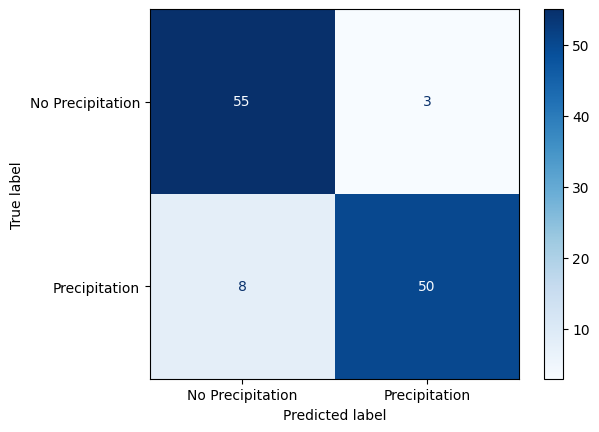

In [ ]:

print("\n--- Evaluating Final Model ---")

# Reset generator 
validation_generator.reset()

# Predictions
predictions = model.predict(
    validation_generator,
    steps=validation_generator.n // validation_generator.batch_size + 1
)
predicted_classes = (predictions > 0.5).astype(int).flatten()

true_classes = validation_generator.classes
predicted_classes = predicted_classes[:len(true_classes)] 

# eval
final_f1 = f1_score(true_classes, predicted_classes)
print(f"Final F1 Score: {final_f1:.4f}")
print("\nFinal Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

# 5. Plot Confusion Matrix to visualize performance
print("\nPlotting Confusion Matrix...")
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Precipitation', 'Precipitation'])
disp.plot(cmap=plt.cm.Blues)
plt.show()



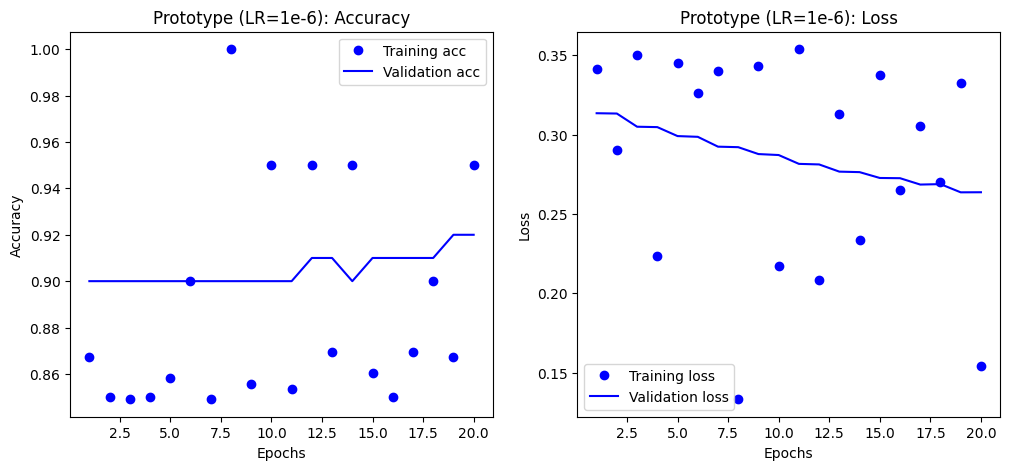

In [ ]:
acc = history_lower_lr.history['accuracy']
val_acc = history_lower_lr.history['val_accuracy']
loss = history_lower_lr.history['loss']
val_loss = history_lower_lr.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Prototype (LR=1e-6): Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Prototype (LR=1e-6): Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Isolating the learning rate as a variable and reducing it has yielded no real stability benefits, which probably means the instability is more fundamental to the dataset or complex unfrozen model. Seeing as it generalizes worse or as well as the prototype with early stopping, the **early stopping model** will be our best generalizing model